# User Cars Price Prediction 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/COMFEST-12/Seleksi/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1KSlWGYjNv_ofsfVuPvX_rwtkZguCojP-/COMFEST-12/Seleksi


In [ ]:
%ls

Seleksi.ipynb  used_car_data.csv


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [ ]:
df = pd.read_csv( 'used_car_data.csv' )

## Get Data Info

### Preview

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### Size

In [ ]:
df.shape

(6019, 12)

### Non-Null Count and Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


### Descriptive Analysis

In [ ]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


## Jawaban

### 1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut?

In [ ]:
data_1 = df.copy()
data_1['Name'] = data_1['Name'].apply( lambda x: x.split( " " )[ 0 ] )
data_1 = data_1.groupby( ['Name'], as_index=False ).agg( { 'Year' : 'count' } )
data_1.columns = [ 'Merek', 'Jumlah' ]
data_1

,Merek,Jumlah
0,Ambassador,1
1,Audi,236
2,BMW,267
3,Bentley,1
4,Chevrolet,121
5,Datsun,13
6,Fiat,28
7,Force,3
8,Ford,300
9,Honda,608


### 2. Kota apa yang memiliki mobil bekas paling banyak?

In [ ]:
data_2 = df.copy()
data_2 = data_2.groupby( ['Location'], as_index=False ).agg( { 'Owner_Type' : 'count' } )
data_2 = data_2.loc[ data_2['Owner_Type'].idxmax() ]
print( "Kota yang memiliki Mobil Bekas paling banyak adalah {kota} dengan jumlah {jumlah} mobil bekas".format(
    kota=data_2['Location'],
    jumlah=data_2['Owner_Type']
) )

Kota yang memiliki Mobil Bekas paling banyak adalah Mumbai dengan jumlah 790 mobil bekas


### 3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?

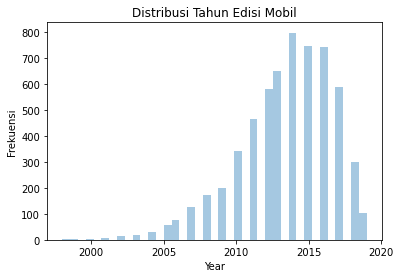

In [ ]:
data_3 = df.copy()
ax = sns.distplot( data_3['Year'], hist=True, rug=False, kde=False )
ax.set_title('Distribusi Tahun Edisi Mobil')
ax.set( xlabel='Year', ylabel='Frekuensi' )
plt.show()

In [ ]:
data_3 = df.copy()
data_3 = data_3.groupby( ['Year'], as_index=False ).agg( { 'Name' : 'count' } )
data_3.columns = [ 'Tahun', 'Jumlah' ]
data_3

,Tahun,Jumlah
0,1998,4
1,1999,2
2,2000,4
3,2001,8
4,2002,15
5,2003,17
6,2004,31
7,2005,57
8,2006,78
9,2007,125


### 4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?

In [ ]:
data_4 = df.copy()
data_4[ data_4['Kilometers_Driven'] < 100000 ]['Name'].count()

5470

### 5 Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban.

In [ ]:
data_5 = df.copy()

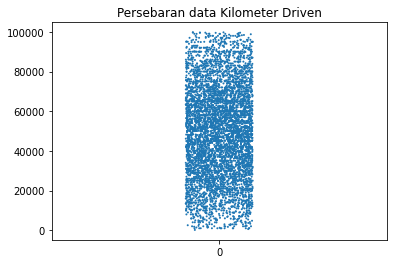

In [ ]:
total_jarak_med = data_5.loc[ data_5['Kilometers_Driven'] < 100000 ]
total_jarak_med = total_jarak_med.loc[:,'Kilometers_Driven']
sns.stripplot(data=total_jarak_med,size=2,jitter=True)
plt.title("Persebaran data Kilometer Driven")
plt.show()

In [ ]:
# total_jarak_med = data_5.loc[:,'Kilometers_Driven']
# total_jarak_arr_med = np.array(total_jarak_med)
# rata_med = np.median(total_jarak_arr_med)
# rata_pembulatan_med = rata_med.round()
# rata_pembulatan_med
data_5['Kilometers_Driven'].median()

53000.0

### 6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.

Text(0.5, 1.0, "Persebaran Data Pada Field 'Kilometers_Driven'")

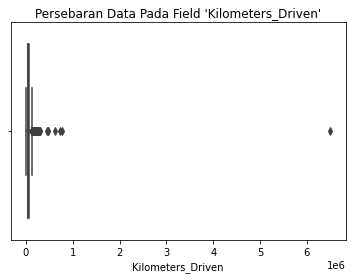

In [ ]:
data_6 = df.copy()
sns.boxplot( x=data_6['Kilometers_Driven'] ).set_title( "Persebaran Data Pada Field 'Kilometers_Driven'" )

Terdapat outlier pada fitur **Kilometers_Driven** di lihat dari data yang berada pada kanan sangat jauh dari mayoritas data

### 7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.

In [ ]:
data_7 = df.copy()
data_7 = data_7[ [ 'Year', 'Kilometers_Driven' ] ]
data_7.corr()

,Year,Kilometers_Driven
Year,1.000000,-0.173048
Kilometers_Driven,-0.173048,1.000000


Text(0.5, 1.0, 'Heatmap Korelasi')

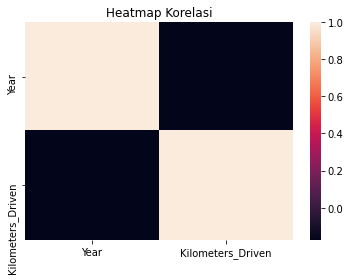

In [ ]:
sns.heatmap(data_7.corr()).set_title( 'Heatmap Korelasi' )

Tidak, karena memiliki korelasi yang negativ antara Year dan Kilometers_Driven

### 8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?

In [ ]:
data_8 = df.copy()
data_8[ ~data_8['Owner_Type'].isin( [ 'First', 'Second' ] ) ]['Name'].count()

122

### 9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?

In [ ]:
data_9 = df.copy()
# memisahkan nilai dari field 'Mileage antar nilai dan satuan'
milage = data_9[ ~data_9['Mileage'].isnull() ]['Mileage'].str.split( ' ' )
data_9.loc[ ~data_9['Mileage'].isnull(), 'Mileage_unit' ] = milage.apply( lambda x: x[1] )
data_9.loc[ ~data_9['Mileage'].isnull(), 'Mileage' ] = milage.apply( lambda x: x[0] ).astype(float)

del milage

In [ ]:
#print tipe fuel dan satuan mileage 
Fuel_Type = data_9['Fuel_Type'].unique()
Mileage_unit = data_9['Mileage_unit'].unique()
Fuel_Type, Mileage_unit

(array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object),
 array(['km/kg', 'kmpl', nan], dtype=object))

In [ ]:
# menghitung jumlah nilai dari setiap fuel_type-mileage_unit dan jumlahnya
for fuel in Fuel_Type:
  for milage_unit in Mileage_unit:
    res = data_9[ (data_9['Fuel_Type'] == fuel) & (data_9['Mileage_unit'] == milage_unit) & ~(data_9['Mileage_unit'].isnull() ) ]['Name'].count()
    print( "{fuel} - {milage_unit} --> {res}".format(
        fuel=fuel,
        milage_unit=milage_unit,
        res=res
    ) )

CNG - km/kg --> 56
CNG - kmpl --> 0
CNG - nan --> 0
Diesel - km/kg --> 0
Diesel - kmpl --> 3205
Diesel - nan --> 0
Petrol - km/kg --> 0
Petrol - kmpl --> 2746
Petrol - nan --> 0
LPG - km/kg --> 10
LPG - kmpl --> 0
LPG - nan --> 0
Electric - km/kg --> 0
Electric - kmpl --> 0
Electric - nan --> 0


Melihat jumlah data dengan satuang **kmpl** lebih banyak dibanding km/kg maka kita rubah semua data menjadi satuan **kmpl**

In [ ]:
# semua data di convert ke kmpl
ratio_liter_to_kg = {
    'CNG'     : 1.4,
    'Diesel'  : 0.832,
    'Petrol'  : 77.0,
    'LPG'     : 0.5102
}

for fuel, ratio in ratio_liter_to_kg.items():
  condition = (data_9['Fuel_Type'] == fuel) & (data_9['Mileage_unit'] == Mileage_unit [ 0 ] ) & ~(data_9['Mileage_unit'].isnull() )
  data_9.loc[ condition, ['Mileage'] ] = data_9.loc[ condition, ['Mileage'] ] * ratio
  data_9.loc[ condition, ['Mileage_unit'] ] = Mileage_unit [ 1 ]

In [ ]:
for fuel in Fuel_Type:
  for milage_unit in Mileage_unit:

    res = data_9[ (data_9['Fuel_Type'] == fuel) & (data_9['Mileage_unit'] == milage_unit) & ~(data_9['Mileage_unit'].isnull() ) ]['Name'].count()
    print( "{fuel} - {milage_unit} --> {res}".format(
        fuel=fuel,
        milage_unit=milage_unit,
        res=res
    ) )

CNG - km/kg --> 0
CNG - kmpl --> 56
CNG - nan --> 0
Diesel - km/kg --> 0
Diesel - kmpl --> 3205
Diesel - nan --> 0
Petrol - km/kg --> 0
Petrol - kmpl --> 2746
Petrol - nan --> 0
LPG - km/kg --> 0
LPG - kmpl --> 10
LPG - nan --> 0
Electric - km/kg --> 0
Electric - kmpl --> 0
Electric - nan --> 0


In [ ]:
data_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Mileage_unit       6017 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


CNG  : Mean -->  35.58525000000001
CNG  : Median -->  37.24
CNG  : Mode -->  0    37.24
dtype: object
Diesel  : Mean -->  18.62048361934485
Diesel  : Median -->  19.01
Diesel  : Mode -->  0    20
dtype: object
Petrol  : Mean -->  17.415203932993382
Petrol  : Median -->  17.8
Petrol  : Mode -->  0    18.9
dtype: object
LPG  : Mean -->  9.890227
LPG  : Median -->  9.311150000000001
LPG  : Mode -->  0    6.86219
1    13.3672
dtype: object
Electric  : Mean -->  nan
Electric  : Median -->  nan
Electric  : Mode -->  Series([], dtype: object)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


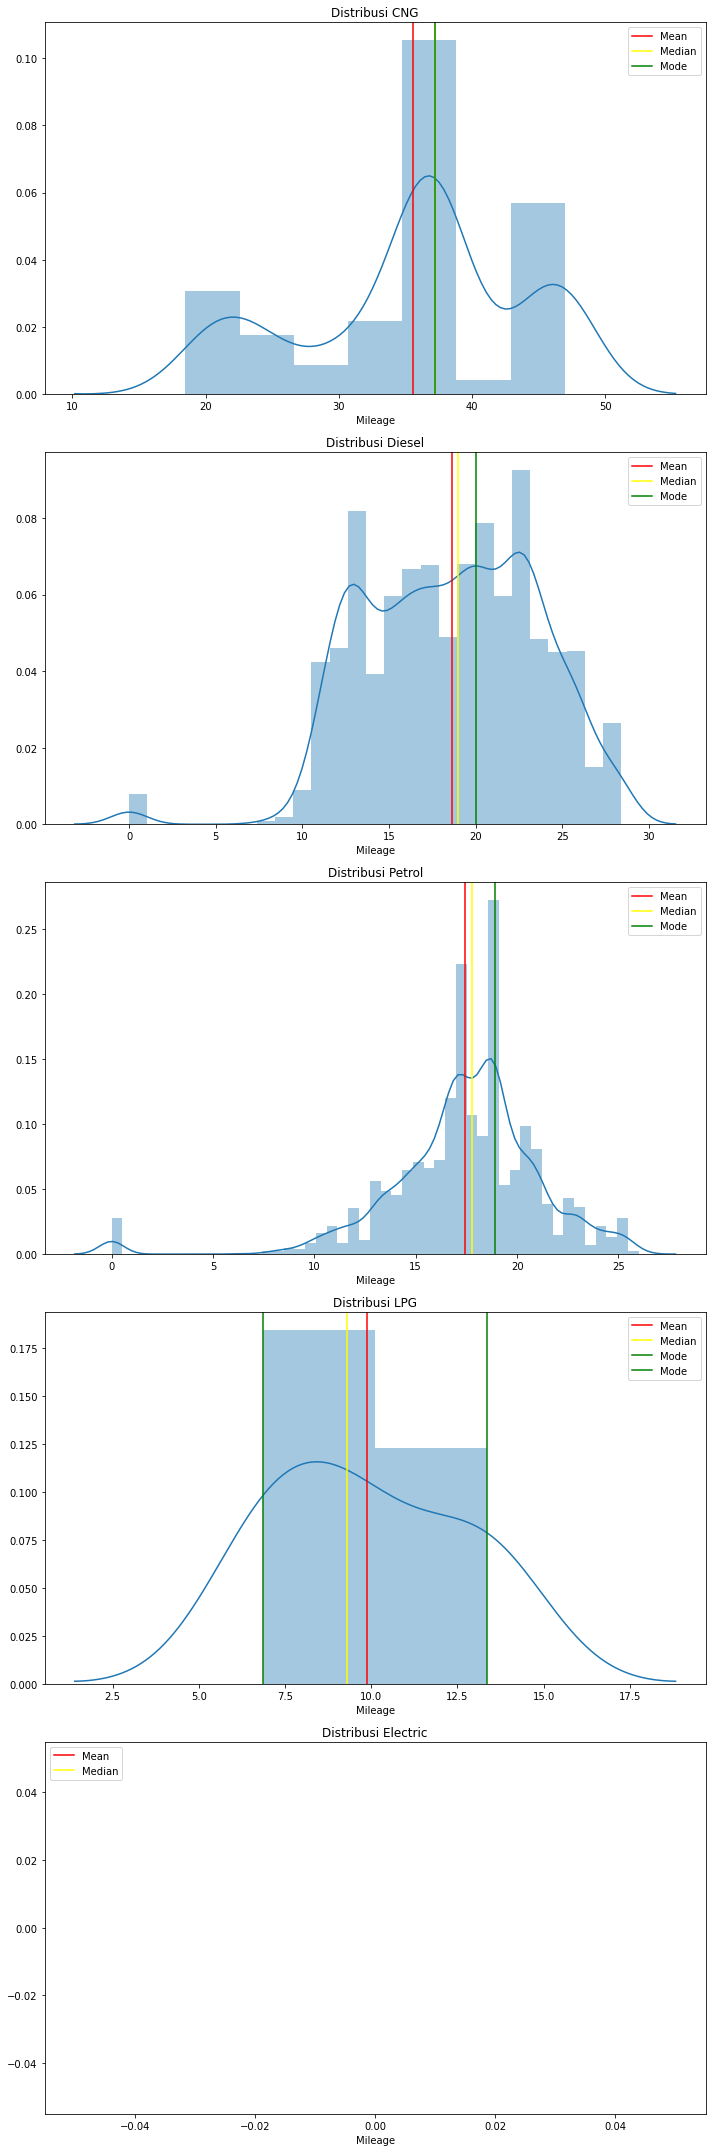

In [ ]:
#menghitung nilai mean, median dan mode untuk setiap fuel type
Fuel_Type = data_9['Fuel_Type'].unique()

fig, axes = plt.subplots(ncols=1, nrows=Fuel_Type.shape[0], figsize=(10,30))

for fuel, ax in zip( Fuel_Type, axes.flat ):

  data = data_9[ data_9['Fuel_Type'] == fuel ]['Mileage']

  sns.distplot( data, hist=True, rug=False, ax=ax )
  ax.axvline( data.mean() , color='red', label='Mean' )
  ax.axvline( data.median() , color='yellow', label='Median' )

  for mode in data.mode():
    ax.axvline( mode , color='green', label='Mode')
  
  print( fuel, ' : Mean --> ', data.mean() )
  print( fuel, ' : Median --> ', data.median() )
  print( fuel, ' : Mode --> ', data.mode() )

  ax.title.set_text( "Distribusi " + fuel )
  fig.tight_layout()
  ax.legend()
plt.show()

Melihat Distribusi di atas bahwa Cetral Tendency yang dapat menggambarkan atau mewakili data hanya Mean dan Median.

In [ ]:
#dicari nilai yang paling minimal dari hasil mean dan median per fuel type
data = [ { 'name': f, 'mean': data_9[ data_9['Fuel_Type'] == f ]['Mileage'].mean(), 'median': data_9[ data_9['Fuel_Type'] == f ]['Mileage'].median() } for f in Fuel_Type ]
data

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


[{'mean': 35.58525000000001, 'median': 37.24, 'name': 'CNG'},
 {'mean': 18.62048361934485, 'median': 19.01, 'name': 'Diesel'},
 {'mean': 17.415203932993382, 'median': 17.8, 'name': 'Petrol'},
 {'mean': 9.890227, 'median': 9.311150000000001, 'name': 'LPG'},
 {'mean': nan, 'median': nan, 'name': 'Electric'}]

In [ ]:
median_min = min( data, key=lambda x: x['median'] )
median_min

{'mean': 9.890227, 'median': 9.311150000000001, 'name': 'LPG'}

In [ ]:
mean_min = min( data, key=lambda x: x['mean'] )
mean_min

{'mean': 9.890227, 'median': 9.311150000000001, 'name': 'LPG'}

Hasil dari minimum median dan mean adalah Bahan Bakar dengan jenis LPG, maka bahan bakar dengan Mileage paling hemat adalah **LPG**

### 10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.

In [ ]:
data_10 = df.copy()

In [ ]:
data_10['Merek'] = data_10['Name'].apply( lambda x: x.split( " " )[ 0 ] )

lb_make = LabelEncoder()
#ubah nilai data menjadi number agar dapat dikalkulasikan
data_10['Merek'] = lb_make.fit_transform( data_10['Merek'] )
data_10['Location'] = lb_make.fit_transform( data_10['Location'] )
data_10['Fuel_Type'] = lb_make.fit_transform( data_10['Fuel_Type'] )
data_10['Transmission'] = lb_make.fit_transform( data_10['Transmission'] )
data_10['Owner_Type'] = lb_make.fit_transform( data_10['Owner_Type'] )

milage = data_10[ ~data_10['Mileage'].isnull() ]['Mileage'].str.split( ' ' )
data_10.loc[ ~data_10['Mileage'].isnull(), 'Mileage_unit' ] = milage.apply( lambda x: x[1] )
data_10.loc[ ~data_10['Mileage'].isnull(), 'Mileage' ] = milage.apply( lambda x: x[0] ).astype(float)
#mileage jadiin satu nilai dengan fuel type yang berbeda
ratio_liter_to_kg = {
    'CNG'     : 1.4,
    'Diesel'  : 0.832,
    'Petrol'  : 77.0,
    'LPG'     : 0.5102
}

for fuel, ratio in ratio_liter_to_kg.items():
  condition = (data_10['Fuel_Type'] == fuel) & (data_10['Mileage_unit'] == Mileage_unit [ 0 ] ) & ~(data_10['Mileage_unit'].isnull() )
  data_10.loc[ condition, ['Mileage'] ] = data_10.loc[ condition, ['Mileage'] ] * ratio
  data_10.loc[ condition, ['Mileage_unit'] ] = Mileage_unit [ 1 ]

del data_10['Mileage_unit']

data_10.loc[ ~data_10['Engine'].isnull(), 'Engine']  = data_10.loc[ ~data_10['Engine'].isnull() ]['Engine'].str.split( ' ' ).apply( lambda x: x[0] ).astype(float)

data_10.loc[ ~data_10['Power'].isnull(), 'Power' ] = data_10.loc[ ~data_10['Power'].isnull() ]['Power'].str.split( ' ' ).apply( lambda x: x[0] )
data_10.loc[ data_10['Power'] == 'null', 'Power' ] = np.nan
data_10['Power'] = data_10['Power'].astype( float )

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Mileage  : Mean -->  18.134960943992073
Mileage  : Median -->  18.15
Mileage  : Mode -->  17.0
Engine  : Mean -->  1621.276449941501
Engine  : Median -->  1493.0
Engine  : Mode -->  1197.0
Power  : Mean -->  113.25304969366827
Power  : Median -->  97.7
Power  : Mode -->  74.0
Seats  : Mean -->  5.278735151413753
Seats  : Median -->  5.0
Seats  : Mode -->  5.0


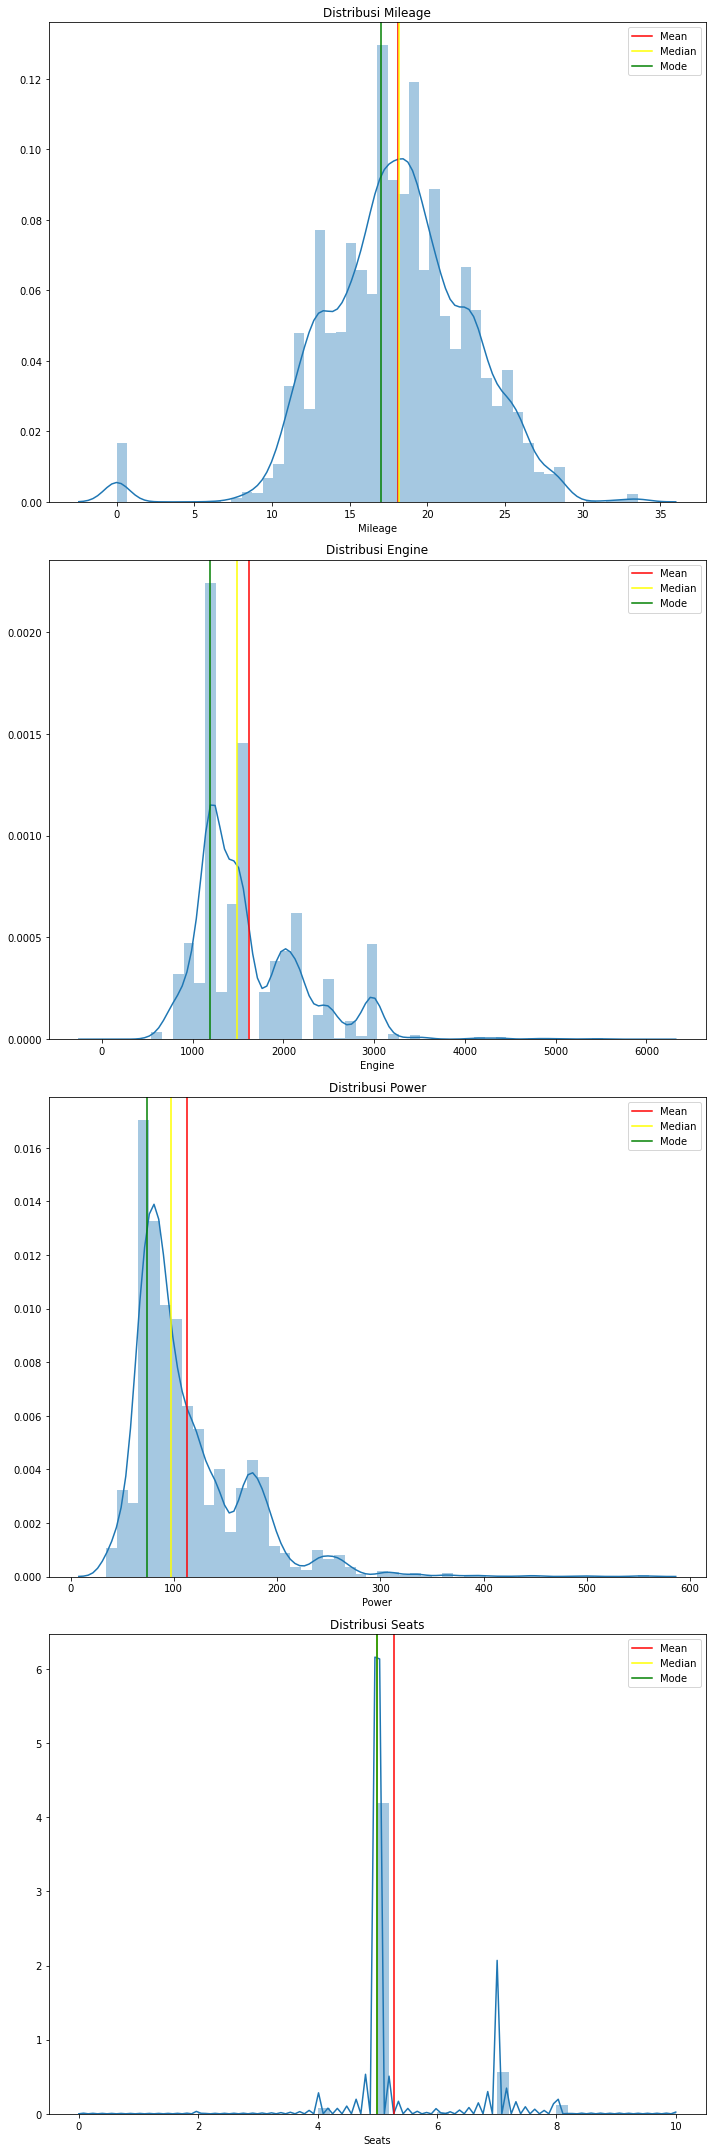

In [ ]:
#nilai per kolom dihitung nilai mean, median dan mode
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(10,30))
cols = [ 'Mileage', 'Engine', 'Power', 'Seats' ]

for col, ax in zip( cols, axes.flat ):

  data = data_10[ col ]

  sns.distplot( data, hist=True, rug=False, ax=ax )
  ax.axvline( data.mean() , color='red', label='Mean' )
  ax.axvline( data.median() , color='yellow', label='Median' )

  print( col, ' : Mean --> ', data.mean() )
  print( col, ' : Median --> ', data.median() )
  print( col, ' : Mode --> ', data.mode()[0] )

  for mode in data.mode():
    ax.axvline( mode , color='green', label='Mode')
  
  ax.title.set_text( "Distribusi " + col )
  fig.tight_layout()
  ax.legend()
plt.show()

In [ ]:
#ganti nilai null dari setiap kolom menjadi nilai yg paling baik 
data_10['Mileage'] = data_10['Mileage'].fillna( data_10['Mileage'].mean() )
data_10['Engine'] = data_10['Engine'].fillna( data_10['Engine'].mode()[0] )
data_10['Power'] = data_10['Power'].fillna( data_10['Power'].mode()[0] )
data_10['Seats'] = data_10['Seats'].fillna( data_10['Seats'].median() )

In [ ]:
data_10.corr()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merek
Location,1.000000,-0.020117,-0.042751,0.115048,0.040174,-0.033889,0.018773,-0.079206,-0.066067,-0.037607,-0.116620,0.026295
Year,-0.020117,1.000000,-0.173048,-0.129526,-0.097059,-0.386160,0.321534,-0.046288,0.039699,0.015204,0.305327,0.018578
Kilometers_Driven,-0.042751,-0.173048,1.000000,-0.102953,0.025663,0.079924,-0.065253,0.090476,0.029932,0.082782,-0.011493,0.028232
Fuel_Type,0.115048,-0.129526,-0.102953,1.000000,0.125219,0.043017,-0.152125,-0.403143,-0.268118,-0.299306,-0.305207,-0.068246
Transmission,0.040174,-0.097059,0.025663,0.125219,1.000000,0.003002,0.333096,-0.498935,-0.641545,0.074838,-0.586025,0.168697
Owner_Type,-0.033889,-0.386160,0.079924,0.043017,0.003002,1.000000,-0.154188,0.046247,0.018352,0.002219,-0.094559,-0.027582
Mileage,0.018773,0.321534,-0.065253,-0.152125,0.333096,-0.154188,1.000000,-0.581302,-0.481955,-0.299631,-0.306588,-0.013374
Engine,-0.079206,-0.046288,0.090476,-0.403143,-0.498935,0.046247,-0.581302,1.000000,0.860401,0.393849,0.657196,0.009390
Power,-0.066067,0.039699,0.029932,-0.268118,-0.641545,0.018352,-0.481955,0.860401,1.000000,0.105539,0.770415,-0.179345
Seats,-0.037607,0.015204,0.082782,-0.299306,0.074838,0.002219,-0.299631,0.393849,0.105539,1.000000,0.052811,0.189674


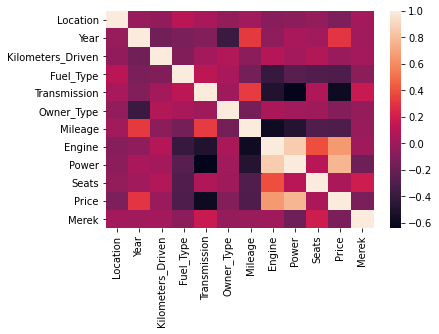

In [ ]:
sns.heatmap(data_10.corr())

**Years, Engine, Power, Seats** -> karena fitur tersebut memiliki korelasi positif terhadap Price

## Analisa Tambahan

### Bagaimana Tren Rata - Rata Harga Mobil 'Maruti Wagon R VXI'

In [ ]:
data_11 = df.copy()

Text(0.5, 1.0, "Tren Rata - Rata Harga Mobil 'Maruti Wagon R VXI'")

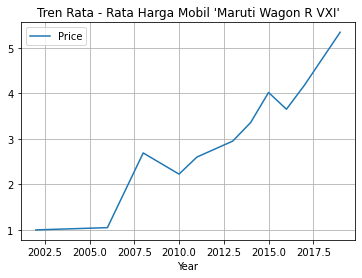

In [ ]:
data_11 = data_11.groupby( ['Name', 'Year'], as_index=False ).agg( { 'Price' : 'mean' } )
data_11 = data_11[ data_11['Name'] == 'Maruti Wagon R VXI' ][ ['Year', 'Price'] ]
data_11 = data_11.set_index('Year')
data_11.plot( grid=True ).set_title("Tren Rata - Rata Harga Mobil 'Maruti Wagon R VXI'")

### Berapa banyak kendaraan Automatic dan Manual pada setiap merek mobil

In [ ]:
data_12 = df.copy()
data_12['Name'] = data_12['Name'].apply( lambda x: x.split( " " )[ 0 ] )
data_12.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
data_12_func_1 = lambda data: data[ data == 'Manual' ].count()
data_12_func_2 = lambda data: data[ data == 'Automatic' ].count()

data_12 = data_12.groupby( ['Name'], as_index=False )
          .agg( { 'Transmission' : [ data_12_func_1, data_12_func_2 ] } )
data_12.columns = ['Name', 'Manual', 'Automatic']
data_12

,Name,Manual,Automatic
0,Ambassador,1,0
1,Audi,0,236
2,BMW,0,267
3,Bentley,0,1
4,Chevrolet,112,9
5,Datsun,13,0
6,Fiat,28,0
7,Force,3,0
8,Ford,261,39
9,Honda,478,130


### Berapa jumlah model, model apa saja yang dijual, dan model apa yang terbanyak di jual setiap Merek

In [ ]:
data_13 = df.copy()
data_13['Model'] = data_13['Name'].apply( lambda x: x.split( " ", 1 )[ 1 ] )
data_13['Name'] = data_13['Name'].apply( lambda x: x.split( " ", 1 )[ 0 ] ).astype(str)

In [ ]:
data_13 = data_13.groupby( ['Name'], as_index=False ).agg( { 
    'Model' : [ 
      lambda data: data.unique().shape[0], 
      lambda data: ", ".join( data.unique() ),
      lambda data: ", ".join( stats.mode( data.unique() )[0] )
    ]
} )
data_13.columns = [ 
    'Brand', 
    'Number_Of_Models', 
    'Models', 
    'Most_Sold_Model'
]
data_13

,Brand,Number_Of_Models,Models,Most_Sold_Model
0,Ambassador,1,Classic Nova Diesel,Classic Nova Diesel
1,Audi,69,"A4 New 2.0 TDI Multitronic, A6 2011-2015 35 TF...",A3 35 TDI Attraction
2,BMW,87,"3 Series 320d, 5 Series 2003-2012 525d, 3 Seri...",1 Series 118d Base
3,Bentley,1,Continental Flying Spur,Continental Flying Spur
4,Chevrolet,43,"Beat LT Option, Beat Diesel LT, Optra Magnum 1...",Aveo 1.4
5,Datsun,9,"GO Plus T Petrol, GO NXT, redi-GO T Option, GO...",GO NXT
6,Fiat,20,"Grande Punto 1.3 Emotion Pack (Diesel), Linea ...",Avventura MULTIJET Emotion
7,Force,2,"One LX 4x4, One LX ABS 7 Seating",One LX 4x4
8,Ford,114,"Figo Diesel Titanium, Fiesta 1.4 SXi TDCi, Fig...",Aspire Ambiente Diesel
9,Honda,154,"Jazz V, City 1.5 V AT Sunroof, Amaze S i-Dtech...",Accord 2.4 A/T


### Tahun Mobil paling tua dan paling baru yang dijual setiap mereknya

In [ ]:
data_14 = df.copy()
data_14['Name'] = data_14['Name'].apply( lambda x: x.split( " ", 1 )[ 0 ] ).astype(str)

In [ ]:
data_14 = data_14.groupby( ['Name'], as_index=False ).agg( { 
    'Year' : [
        'min',
        'max'
    ]
} )
data_14.columns = [ 
    'Brand', 
    'Oldest_Car_Year', 
    'Newest_Car_Year',
]
data_14

,Brand,Oldest_Car_Year,Newest_Car_Year
0,Ambassador,2003,2003
1,Audi,2008,2019
2,BMW,2006,2019
3,Bentley,2006,2006
4,Chevrolet,2004,2018
5,Datsun,2016,2018
6,Fiat,2001,2018
7,Force,2014,2014
8,Ford,2002,2019
9,Honda,1999,2019


### Jenis Bahan Bakar dan Transmisi yang dijual Setiap Merek

In [ ]:
data_15 = df.copy()
data_15['Name'] = data_15['Name'].apply( lambda x: x.split( " ", 1 )[ 0 ] ).astype(str)

In [ ]:
data_15 = data_15.groupby( ['Name'], as_index=False ).agg( { 
    'Fuel_Type' : lambda data: ", ".join( stats.mode( data.unique() )[0] ),
    'Transmission' : lambda data: ", ".join( stats.mode( data.unique() )[0] ),
} )
data_15.columns = [ 
    'Brand', 
    'Most_Sold_Fuel_Type',
    'Most_Sold_Transmission'
]
data_15

,Brand,Most_Sold_Fuel_Type,Most_Sold_Transmission
0,Ambassador,Diesel,Manual
1,Audi,Diesel,Automatic
2,BMW,Diesel,Automatic
3,Bentley,Petrol,Automatic
4,Chevrolet,Diesel,Automatic
5,Datsun,Petrol,Manual
6,Fiat,Diesel,Manual
7,Force,Diesel,Manual
8,Ford,Diesel,Automatic
9,Honda,Diesel,Automatic


### Milaege, Mesin, Tenaga, dan Jumlah Kursi yang terbanyak terjual setiap model

In [ ]:
data_16 = df.copy()
data_16['Name'] = data_16['Name'].apply( lambda x: x.split( " ", 1 )[ 0 ] ).astype(str)

In [ ]:
data_16['Merek'] = data_16['Name'].apply( lambda x: x.split( " " )[ 0 ] )

milage = data_16[ ~data_16['Mileage'].isnull() ]['Mileage'].str.split( ' ' )
data_16.loc[ ~data_16['Mileage'].isnull(), 'Mileage_unit' ] = milage.apply( lambda x: x[1] )
data_16.loc[ ~data_16['Mileage'].isnull(), 'Mileage' ] = milage.apply( lambda x: x[0] ).astype(float)

#mileage jadiin satu nilai dengan fuel type yang berbeda
ratio_liter_to_kg = {
    'CNG'     : 1.4,
    'Diesel'  : 0.832,
    'Petrol'  : 77.0,
    'LPG'     : 0.5102
}

for fuel, ratio in ratio_liter_to_kg.items():
  condition = (data_16['Fuel_Type'] == fuel) & (data_16['Mileage_unit'] == Mileage_unit [ 0 ] ) & ~(data_16['Mileage_unit'].isnull() )
  data_16.loc[ condition, ['Mileage'] ] = data_16.loc[ condition, ['Mileage'] ] * ratio
  data_16.loc[ condition, ['Mileage_unit'] ] = Mileage_unit [ 1 ]

del data_16['Mileage_unit']

data_16.loc[ ~data_16['Engine'].isnull(), 'Engine']  = data_16.loc[ ~data_16['Engine'].isnull() ]['Engine'].str.split( ' ' ).apply( lambda x: x[0] ).astype(float)

data_16.loc[ ~data_16['Power'].isnull(), 'Power' ] = data_16.loc[ ~data_16['Power'].isnull() ]['Power'].str.split( ' ' ).apply( lambda x: x[0] )
data_16.loc[ data_16['Power'] == 'null', 'Power' ] = np.nan
data_16['Power'] = data_16['Power'].astype( float )

Mileage  : Mean -->  18.21380692537815
Mileage  : Median -->  18.16
Mileage  : Mode -->  17.0
Engine  : Mean -->  1621.276449941501
Engine  : Median -->  1493.0
Engine  : Mode -->  1197.0
Power  : Mean -->  113.25304969366827
Power  : Median -->  97.7
Power  : Mode -->  74.0
Seats  : Mean -->  5.278735151413753
Seats  : Median -->  5.0
Seats  : Mode -->  5.0


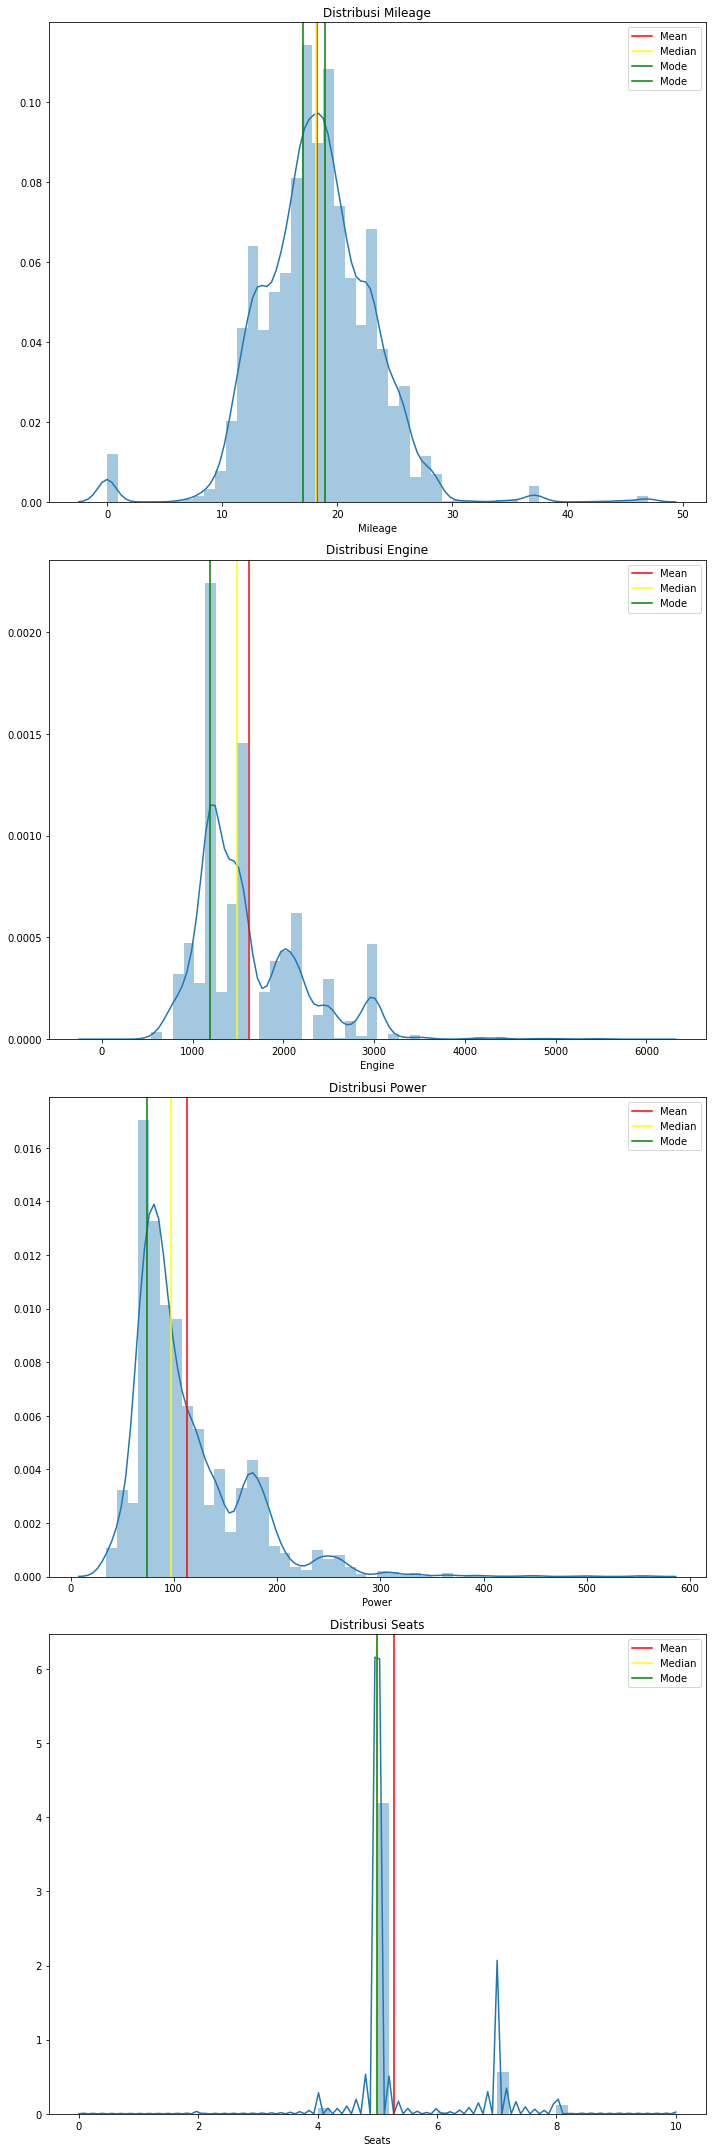

In [ ]:
#nilai per kolom dihitung nilai mean, median dan mode
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(10,30))
cols = [ 'Mileage', 'Engine', 'Power', 'Seats' ]

for col, ax in zip( cols, axes.flat ):

  data = data_16[ col ]

  sns.distplot( data, hist=True, rug=False, ax=ax )
  ax.axvline( data.mean() , color='red', label='Mean' )
  ax.axvline( data.median() , color='yellow', label='Median' )

  for mode in data.mode():
    ax.axvline( mode , color='green', label='Mode')

  print( col, ' : Mean --> ', data.mean() )
  print( col, ' : Median --> ', data.median() )
  print( col, ' : Mode --> ', data.mode()[0] )
  
  ax.title.set_text( "Distribusi " + col )
  fig.tight_layout()
  ax.legend()
plt.show()

In [ ]:
#ganti nilai null dari setiap kolom menjadi nilai yg paling baik 
data_16['Mileage'] = data_16['Mileage'].fillna( data_16['Mileage'].mean() )
data_16['Engine'] = data_16['Engine'].fillna( data_16['Engine'].mode()[0] )
data_16['Power'] = data_16['Power'].fillna( data_16['Power'].mode()[0] )
data_16['Seats'] = data_16['Seats'].fillna( data_16['Seats'].median() )

In [ ]:
data_16 = data_16.groupby( ['Name'], as_index=False ).agg( { 
    'Mileage' : lambda data: ", ".join( stats.mode( data.unique() )[0].astype(str) ),
    'Engine' : lambda data: ", ".join( stats.mode( data.unique() )[0].astype(str) ),
    'Power' : lambda data: ", ".join( stats.mode( data.unique() )[0].astype(str) ),
    'Seats' : lambda data: ", ".join( stats.mode( data.unique() )[0].astype(str) ),
} )
data_16.columns = [ 
    'Brand',
    'Most_Sold_Mileage (kmpl)',
    'Most_Sold_Engine (CC)',
    'Most_Sold_Power (bhp)',
    'Most_Sold_Seats',
]
data_16

,Brand,Most_Sold_Mileage (kmpl),Most_Sold_Engine (CC),Most_Sold_Power (bhp),Most_Sold_Seats
0,Ambassador,12.8,1489.0,35.5,5.0
1,Audi,0.0,1395.0,74.0,0.0
2,BMW,7.94,1197.0,74.0,2.0
3,Bentley,8.6,5998.0,552.0,4.0
4,Chevrolet,11.5,936.0,56.3,4.0
5,Datsun,19.44,799.0,53.0,5.0
6,Fiat,0.0,1172.0,67.0,5.0
7,Force,17.0,2149.0,139.01,7.0
8,Ford,0.0,999.0,67.0,4.0
9,Honda,0.0,1197.0,74.0,5.0


# Kesimpulan

- LPG merupakan tipe bahan bakar yang paling hemat. 

- Harga mobil bekas di India dipengaruhi oleh beberapa faktor seperti tahun edisi , kapasitas mesin, tenaga maksimum mesin dan jumlah kursi mobil. 

- Setiap tahunnya, mobil 'Maruti Wagon R VXI' akan mengalami tren naik atau bullish. 

- Pada setiap merek terdapat model mobil yang paling banyak terjual dan spesifikasi rinciannya seperti jenis bahan bakar, tipe transmisi, tingkat konsumsi bahan bakar, kapasitas mesin, tenaga maksimum dan jumlah kursi mobil yang paling diminati. Diharapkan dengan adanya hasil analisis ini dapat meningkatkan penjualan mobil pada setiap merek. 